In [11]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
#Provides statistical functions;
#stats contains a variety of statistical tests.
from statsmodels.stats import descriptivestats as sd
#Provides descriptive statistics tools, including the sign_test.
from statsmodels.stats.weightstats import ztest
#Used for conducting z-tests on datasets.

# 1-sample Sign-test

In [4]:

#whenever there is single sample and data is not normal 
marks=pd.read_csv("C:/Users/HP/Downloads/Signtest.csv")
marks

,Scores
0,60
1,75
2,90
3,99
4,98
5,80
6,90
7,100
8,70
9,75


In [5]:
#Normal QQ plot
import pylab

((array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
         -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
          0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
          0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ]),
  array([ 60,  65,  70,  70,  71,  72,  75,  75,  80,  88,  90,  90,  90,
          97,  97,  98,  98,  99,  99, 100], dtype=int64)),
 (13.387642315268574, 84.2, 0.9528719246176001))

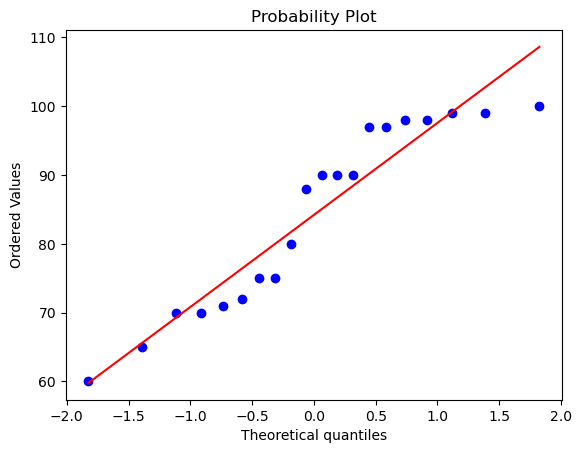

In [6]:
stats.probplot(marks.Scores,dist="norm",plot=pylab)

In [7]:
#Test for normality

In [8]:
shapiro_test=stats.shapiro(marks.Scores)

In [9]:
#performs the Shapiro-Wilk Test for normality.
#H0(NULL Hypothesis):the data is normally distributed
#H1(NULL Alternate Hypothesis): The data is not normally distributed
#outputs a test statistics and p-value

In [10]:
print("Shapiro Test:",shapiro_test)

Shapiro Test: ShapiroResult(statistic=0.8875984049096806, pvalue=0.024299306804881928)


In [11]:
#p-value is 0.024<0.05 data is not normal

In [12]:
#Descriptive statistics

In [13]:
print(marks.Scores.describe())

count     20.00000
mean      84.20000
std       13.33614
min       60.00000
25%       71.75000
50%       89.00000
75%       97.25000
max      100.00000
Name: Scores, dtype: float64


In [14]:
#mean=84.20 and ,median=89.00

In [15]:
##1-sample Sign-test

In [16]:
sign_test_result=sd.sign_test(marks.Scores,mu0=marks.Scores.mean())

In [18]:
print(sign_test_result)

(1.0, 0.8238029479980469)


In [19]:
#Interpretation:

In [21]:
'''
H0:median=mean
h1:meadin!=mean
since the p-value=0.82, is greater than 0.05 we fail to reject the null hypothesis
##CONCLUSION: The median and mean of scores are statistically not similar.
'''

'\nH0:median=mean\nh1:meadin!=mean\nsince the p-value=0.82, is greater than 0.05 we fail to reject the null hypothesis\n##CONCLUSION: The median and mean of scores are statistically not similar.\n'

# 1-sample z-test

In [23]:
fabric=pd.read_csv("C:/Users/HP/Downloads/Fabric_data.csv")

In [24]:
fabric

,Fabric_length
0,151.2
1,160.3
2,147.5
3,149.2
4,159.2
5,155.6
6,148.1
7,154.8
8,156.8
9,167.5


In [25]:
#Normality Test

In [26]:
fabric_normality=stats.shapiro(fabric)

In [27]:
fabric_normality

ShapiroResult(statistic=0.9397524078584506, pvalue=0.1460935830606142)

In [28]:
#pvalue=0.1460935830606142 > 0.05

In [29]:
fabric_mean=np.mean(fabric)

In [30]:
fabric_mean

155.064

## Z-test

In [33]:
z_test_result,p_val=ztest(fabric["Fabric_length"],value=150)

In [34]:
print("Z-test Result: ",z_test_result,"P-value: ",p_val)

Z-test Result:  4.488987748287781 P-value:  7.156241255356764e-06


In [35]:
'''
#Interpretation
Result: p-value= 7.15 x 10^-6
H0: 

'''

'\n#Interpretation\nResult: p-value= 7.15 x 10^-6\nH0: \n\n'

# Man-Whiteny Test

In [36]:
fuel=pd.read_csv("C:/Users/HP/Downloads/mann_whitney_additive.csv")

In [37]:
fuel

,Without additive,With Additive
0,12.5,16.0
1,19.0,22.0
2,15.0,18.5
3,19.5,22.5
4,12.5,15.0
5,16.0,16.0
6,14.5,13.5
7,17.5,16.0
8,20.0,22.5
9,17.0,16.0


In [38]:
fuel.columns=["without_additive","With_additive"]

In [39]:
#Normality Test

In [40]:
print("without_additive Normality: ",stats.shapiro(fuel.without_additive))

without_additive Normality:  ShapiroResult(statistic=0.9352245458832077, pvalue=0.5011960013441327)


In [42]:
#pvalue=0.50 > 0.05: Accept H0

In [44]:
print("with_additive Normality: ",stats.shapiro(fuel.With_additive))


with_additive Normality:  ShapiroResult(statistic=0.8373827516988624, pvalue=0.041048403229593605)


In [45]:
#pvalue=0.04 < 0.05 : Reject H0 ==> Data is not normal

# Man-Whiteny U Test

In [46]:
mannWhiteny_result=stats.mannwhitneyu(fuel.without_additive,fuel.With_additive)

In [47]:
print("Mann-Whiteny Test Result: ",mannWhiteny_result)

Mann-Whiteny Test Result:  MannwhitneyuResult(statistic=39.5, pvalue=0.4457311042015709)


'''
<b>#Interpretation<br>
Result: p-value= 7.15 x 10^-6<br>
H0:  No difference in performance between without_additive and with_additive<br>
h1: A significant difference exists.<br>
since the p-value(0.445)>0.05 , we fail to reject the null hypothesis<br>
Conclusion: Adding fuel addidtive does not significantly performance<br>
Applies the Mann-Whitney U test to check if there is a significant differnece between H0 an H1<br>
H0: No difference in performance between two groups<br>
h1: Significant Differnce in performance<br>
'''

# #Paired T-Test

In [50]:
#Objective: To check whether there is diff in transaction time of supplier_A and Supplier_B 

In [51]:
sup=pd.read_csv("C:/Users/HP/Downloads/paired2.csv")

In [52]:
sup

,SupplierA,SupplierB
0,6.15,7.15
1,6.22,7.22
2,6.76,7.76
3,4.29,5.29
4,7.08,8.08
...,...,...
115,5.85,6.85
116,5.04,6.04
117,5.68,6.68
118,4.77,5.77


#Normality Tests

In [54]:
print("Supplier A normality Test: ",stats.shapiro(sup.SupplierA))

Supplier A normality Test:  ShapiroResult(statistic=0.9940788430927854, pvalue=0.8962103654175757)


In [55]:
#pvalue=0.89 > 0.05 : fails to reject the HO ==> data is normal

In [56]:
print("Supplier B normality Test: ",stats.shapiro(sup.SupplierB))

Supplier B normality Test:  ShapiroResult(statistic=0.9940788430927854, pvalue=0.8962103654175757)


In [57]:
#pvalue=0.89 >0.05 : fails to reject the HO ==> data is normal

# Paired T-Test

In [60]:
t_test_result,p_val=stats.ttest_rel(sup["SupplierA"],sup["SupplierB"])

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
print("Paired T-test Result: ",t_test_result,"P-value: ",p_val)

Paired T-test Result:  -4.996833558918069e+16 P-value:  0.0


In [ ]:
'''
<b>#Interpretation<br>
Result: p-value= 0.00<br>
H0:  No difference in performance between SupplierA and SupplierB <br>
h1: A significant difference exists.<br>
since the p-value(0.0)<0.05 , we reject null hypothesis<br>
Conclusion: diff in transaction time of supplier_A and Supplier_B  <br>
H0: No difference in performance between two groups<br>
h1: Significant Differnce in performance<br>
'''

# 15/01/2025

# Two sample T-test

In [4]:
import pandas as pd

In [19]:
offers=pd.read_excel("C:/Users/HP/Downloads/Promotion.xlsx")
offers

,Interest Rate Waiver ($ spent),Standard Promotion ($ spent)
0,1989.10,1272.25
1,1808.38,1250.38
2,1153.75,1474.78
3,1745.64,2064.89
4,1008.24,2030.87
...,...,...
245,1730.41,2047.49
246,947.66,1685.44
247,1516.43,1840.55
248,1609.69,1603.48


In [45]:
offers.describe()

,InterestRateWaiver,StandardPromotion
count,250.00000,250.000000
mean,1637.50000,1566.388960
std,356.70306,346.673271
min,745.65000,544.600000
25%,1407.26750,1361.290000
50%,1661.08000,1547.360000
75%,1884.88000,1788.362500
max,2637.88000,2713.030000


In [20]:
offers.columns=["InterestRateWaiver","StandardPromotion"]

In [21]:
#Normality test

In [22]:
print("InterestRateWaiver Normality: ",stats.shapiro(offers.InterestRateWaiver))

InterestRateWaiver Normality:  ShapiroResult(statistic=0.9923668605850225, pvalue=0.22460944304178543)


In [24]:
print("StandardPromotion Normality: ",stats.shapiro(offers.StandardPromotion))

StandardPromotion Normality:  ShapiroResult(statistic=0.9919790893297836, pvalue=0.1916020629878476)


In [25]:
#Variance test

In [26]:
levene_test=scipy.stats.levene(offers.InterestRateWaiver,offers.StandardPromotion)
print("Levene Test (Varience):",levene_test)

Levene Test (Varience): LeveneResult(statistic=1.1334674473666406, pvalue=0.2875528565130808)


In [27]:
#p-value= 0.2875
#H0=variance equal
#H1=variance unequal
#pvalue=0.2875>0.05 Fail to reject null hypothesis(H0 is accpetd)

In [28]:
#Two sample T-test

In [29]:
ttest_result=scipy.stats.ttest_ind(offers.InterestRateWaiver,offers.StandardPromotion)
print("Two sample T-test: ",ttest_result)

Two sample T-test:  TtestResult(statistic=2.2604251631369405, pvalue=0.02422584468584315, df=498.0)


In [31]:
#result:
#p-value=0.024
#Interepretation
#H0: Both offers have the same mean impact
#H1: The impacts of the two offers are different
#p value(0.0242)<0.05 ===>Reject the null hypothesis(H0)
#Conclusion: there is significant differnce in between the two promotional offers 

# Mood's Median Test

In [32]:
#Objective: Is the medians of pooh and piglet and tigger are statistically equal
#it has equal medians are not

In [33]:
animals=pd.read_csv("C:/Users/HP/Downloads/animals.csv")

In [34]:
animals.head()

,Pooh,Piglet,Tigger
0,3,2,4
1,5,4,4
2,4,2,4
3,4,2,4
4,4,1,5


In [35]:
#Normality Test

In [36]:
print("Pooh Normality:",stats.shapiro(animals.Pooh))

Pooh Normality: ShapiroResult(statistic=0.7940640042001077, pvalue=0.012278706990549835)


In [37]:
print("Piglet Normality: ",stats.shapiro(animals.Piglet))

Piglet Normality:  ShapiroResult(statistic=0.8406218876778937, pvalue=0.0448877061706223)


In [38]:
print("Tigger Normality: ",stats.shapiro(animals.Tigger))

Tigger Normality:  ShapiroResult(statistic=0.8148397633016432, pvalue=0.02194779011724865)


In [40]:
#H0: Data is normal
#H1: Data is not normal
#since all p values are less than 0.05 hence reject the null hypothesis
#Data is not normal,hence mood's test

# Mood's median test

In [41]:
median_test_result=stats.median_test(animals.Pooh,animals.Piglet,animals.Tigger)
print("Mood's Median Test: ",median_test_result)

Mood's Median Test:  MedianTestResult(statistic=3.3599999999999994, pvalue=0.18637397603941, median=4.0, table=array([[ 3,  0,  2],
       [ 7, 10,  8]], dtype=int64))


In [43]:
#Result:
#Interpretation:
#H0: All groups have eual medians
#H1: All groups have not equal medians
#p-value 0.1863>0.05==> Fails to reject the Null Hypothesis(Accept the H0)
#Conclusion: All groups have significantly equal medians

In [44]:
animals.describe()

,Pooh,Piglet,Tigger
count,10.000000,10.000000,10.000000
mean,4.200000,2.300000,4.000000
std,0.632456,0.823273,0.666667
min,3.000000,1.000000,3.000000
25%,4.000000,2.000000,4.000000
50%,4.000000,2.000000,4.000000
75%,4.750000,2.750000,4.000000
max,5.000000,4.000000,5.000000


# One-Way ANOVA

In [46]:
#Objective: Transaction time for three suppliers is not significantly different

In [47]:
contract=pd.read_excel("C:/Users/HP/Downloads/ContractRenewal_Data(unstacked).xlsx")

In [48]:
contract.head()

,Supplier A,Supplier B,Supplier C
0,6.15,7.87,7.41
1,6.22,5.21,3.61
2,6.76,7.94,7.23
3,4.29,7.36,5.53
4,7.08,6.17,3.97


In [49]:
contract.describe()

,Supplier A,Supplier B,Supplier C
count,120.000000,120.000000,120.000000
mean,5.713917,6.096417,5.945167
std,1.349004,1.389692,1.451699
min,2.330000,2.650000,2.750000
25%,4.725000,5.130000,4.965000
50%,5.645000,6.185000,6.015000
75%,6.625000,7.042500,7.020000
max,9.010000,9.960000,9.940000


In [50]:
contract.columns=["Supp_A","Supp_B","Supp_C"]

In [52]:
#Normality tests

In [53]:
print("Supp_A Normality: ",stats.shapiro(contract.Supp_A))
print("Supp_B Normality: ",stats.shapiro(contract.Supp_B))
print("Supp_C Normality: ",stats.shapiro(contract.Supp_C))


Supp_A Normality:  ShapiroResult(statistic=0.9940788430927858, pvalue=0.8962103654176035)
Supp_B Normality:  ShapiroResult(statistic=0.9912330085810608, pvalue=0.6483890667842709)
Supp_C Normality:  ShapiroResult(statistic=0.990415383031867, pvalue=0.5718975538301782)


In [54]:
#All p-values are grater than 0.05

In [66]:
#We fail to reject the null hypothesis
#H0 is accepted means data is ==>normal

In [58]:
#Variance test

In [59]:
levene_test=scipy.stats.levene(contract.Supp_A,contract.Supp_B,contract.Supp_C)
print("Levene Test (Variance): ",levene_test)

Levene Test (Variance):  LeveneResult(statistic=0.25183988720942463, pvalue=0.7775071819400866)


In [63]:
#H0: data is having equal variance
#H1: data is not having equal variance
#p-value(0.777>0.05) ===>Fails to reject the H0 (Accepted the H0)


In [64]:
# anova Test

In [65]:
anova_result=stats.f_oneway(contract.Supp_A,contract.Supp_B,contract.Supp_C)
print("One way ANOVA: ",anova_result)

One way ANOVA:  F_onewayResult(statistic=2.280378701368123, pvalue=0.10373295731933224)


In [ ]:
#Result: p-value=>0.103
#Interepretation: 
#H0: All suppliers have same mean transaction time
#H1: At least one supplier has different mean
#since the p-value(0.103) is greater than 0.05, we fail to reject H0 (Accepted H0)
#Conclusion: Transaction time for three suppliers are not significantly equal